<a href="https://colab.research.google.com/github/Mehul-Agrawal410/AgentJackie_WiDS_2023/blob/main/Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('train.csv')
df

,row_id,feature,target
0,0,2.981457,5.393127
1,1,4.073529,5.842601
2,2,9.272826,7.384454
3,3,0.705137,4.606203
4,4,7.241643,6.553693
...,...,...,...
1045,1045,3.769486,5.975355
1046,1046,1.661592,4.717327
1047,1047,6.077923,6.749978
1048,1048,3.963448,6.339758


Let's first create and evaluate the model on the train dataset, by splitting it into train and test sets

In [ ]:
class LinearRegression():

  def __init__(self, lr = 0.01, epochs = 1000):
    self.lr = lr
    self.epochs = epochs

  def fit(self, X, y):

    if X.shape[1] != 1 or y.shape[1] != 1:
      return ("inputs and targets should be of form (m,1)")
    if X.shape != y.shape:
      return ("shape mismatch")

    n = len(X)
    self.W = np.random.rand()
    self.b = 0
    for i in range(self.epochs):
      y_pred = self.predict(X)
      loss = np.sum((y - y_pred) ** 2) / n / 2
      dW = -2 * X.T.dot(y - y_pred) / n
      db = -2 * np.sum(y-y_pred) / n
      if (i+1) % 50 == 0:
        print(f"Epoch: {i+1}/{self.epochs}, Loss: {loss}")
      self.W = self.W - self.lr*dW
      self.b = self.b - self.lr * db
    return self

  def predict(self, X):
    return self.W*X + self.b

In [ ]:
X = df['feature'].values
y = df['target'].values
X = np.expand_dims(X, axis = 1)
y = np.expand_dims(y, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 4/5)

lr = LinearRegression(lr = 0.01, epochs = 1000)
lr.fit(X_train, y_train)
print("trained W: ", lr.W)
print("trained b: ", lr.b)

Epoch: 50/1000, Loss: 1.7599796401690344
Epoch: 100/1000, Loss: 1.09001179586539
Epoch: 150/1000, Loss: 0.6869388978358912
Epoch: 200/1000, Loss: 0.44443806364322064
Epoch: 250/1000, Loss: 0.29854223469607827
Epoch: 300/1000, Loss: 0.21076689579863647
Epoch: 350/1000, Loss: 0.15795859980991378
Epoch: 400/1000, Loss: 0.12618753335478003
Epoch: 450/1000, Loss: 0.10707309982122881
Epoch: 500/1000, Loss: 0.09557327907002687
Epoch: 550/1000, Loss: 0.08865463944214386
Epoch: 600/1000, Loss: 0.08449217679719243
Epoch: 650/1000, Loss: 0.08198791350231147
Epoch: 700/1000, Loss: 0.08048127303847602
Epoch: 750/1000, Loss: 0.07957483261270015
Epoch: 800/1000, Loss: 0.07902949066470213
Epoch: 850/1000, Loss: 0.07870139647142775
Epoch: 900/1000, Loss: 0.07850400509147692
Epoch: 950/1000, Loss: 0.07838524847317159
Epoch: 1000/1000, Loss: 0.07831380090340014
trained W:  [[0.28878136]]
trained b:  4.716790573096173


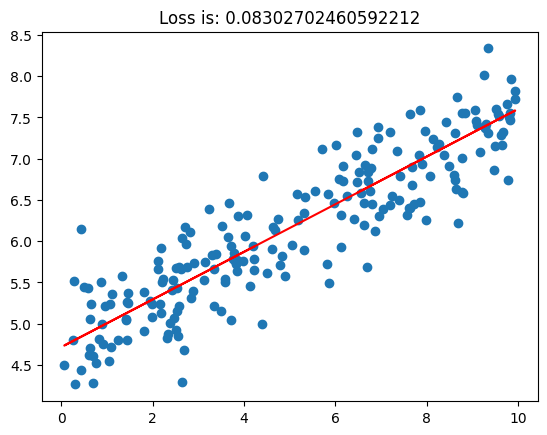

In [ ]:
y_test_pred = lr.predict(X_test)
plt.plot(X_test, y_test_pred, color = "red")
plt.scatter(X_test,y_test)
plt.title("Loss is: " + str(np.sum((y_test - y_test_pred) ** 2) / len(X_test) / 2))
plt.show()

We can see that the results are quite satisfactory, so now we will train the model on the entire train dataset and make predictions on the test dataset

In [ ]:
X = df['feature'].values
Y = df['target'].values
X = np.expand_dims(X, axis = 1)
Y = np.expand_dims(Y, axis = 1)

model = LinearRegression()
model.fit(X, Y)
W = model.W
b = model.b
print("W: ", W, "b: ", b)

Epoch: 50/1000, Loss: 1.79539887305426
Epoch: 100/1000, Loss: 1.1146601954010704
Epoch: 150/1000, Loss: 0.7039304083496167
Epoch: 200/1000, Loss: 0.4561129072889846
Epoch: 250/1000, Loss: 0.3065899952235812
Epoch: 300/1000, Loss: 0.2163740050823189
Epoch: 350/1000, Loss: 0.1619413782377568
Epoch: 400/1000, Loss: 0.12909896459733716
Epoch: 450/1000, Loss: 0.10928319974717605
Epoch: 500/1000, Loss: 0.09732718028721699
Epoch: 550/1000, Loss: 0.09011340870646685
Epoch: 600/1000, Loss: 0.08576091491925633
Epoch: 650/1000, Loss: 0.08313479875302537
Epoch: 700/1000, Loss: 0.0815503080091662
Epoch: 750/1000, Loss: 0.08059429130676005
Epoch: 800/1000, Loss: 0.08001747005436614
Epoch: 850/1000, Loss: 0.07966943977793284
Epoch: 900/1000, Loss: 0.0794594525889872
Epoch: 950/1000, Loss: 0.07933275493505564
Epoch: 1000/1000, Loss: 0.07925631076914068
W:  [[0.28809212]] b:  4.713090888674583


In [ ]:
df_test = pd.read_csv('test.csv')
df_test

,row_id,feature
0,0,1.160535
1,1,9.869024
2,2,5.611131
3,3,0.328108
4,4,8.794113
...,...,...
445,445,1.666243
446,446,6.718031
447,447,3.277955
448,448,0.420212


In [ ]:
test_features = np.expand_dims(df_test['feature'].values, axis = 1)
preds = model.predict(test_features)
df_test['predictions'] = preds
df_test

,row_id,feature,predictions
0,0,1.160535,5.047432
1,1,9.869024,7.556279
2,2,5.611131,6.329613
3,3,0.328108,4.807616
4,4,8.794113,7.246606
...,...,...,...
445,445,1.666243,5.193122
446,446,6.718031,6.648503
447,447,3.277955,5.657444
448,448,0.420212,4.834151


In [ ]:
df_test.drop(['feature'], axis = 1, inplace = True)
df_test.to_csv('submission.csv', index = False)